In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

1. Необходимо сгенерировать 

# Сгенерировать данные

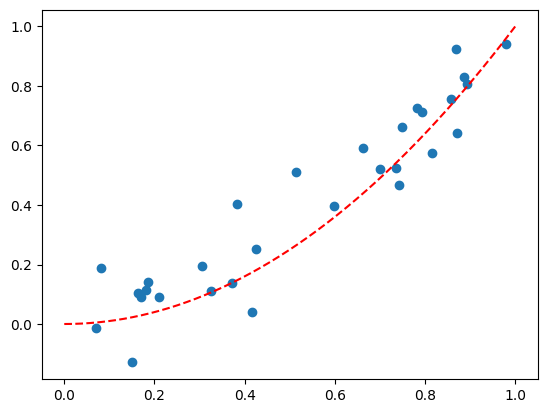

In [114]:
np.random.seed(27)

n = 30

X_act = np.linspace(0, 1, 1000).reshape((-1, 1))
X = np.random.uniform(0, 1, size=(n, 1))

f = lambda x: x**2

sigma = 0.1
noise = np.random.randn(n, 1) * sigma   
y = f(X) + noise

y_act = f(X_act)

plt.scatter(X, y)
plt.plot(X_act, y_act, linestyle='--', c='r')

In [115]:
from sklearn.linear_model import LinearRegression

# Методом наименьших квадратов получить оценки коэффициентов регрессии

In [116]:
lr = LinearRegression()
lr.fit(X, y)
y_act_pred = lr.predict(X_act)
y_act_pred

array([[-1.08060957e-01],
       [-1.07081044e-01],
       [-1.06101131e-01],
       [-1.05121218e-01],
       [-1.04141305e-01],
       [-1.03161392e-01],
       [-1.02181479e-01],
       [-1.01201566e-01],
       [-1.00221653e-01],
       [-9.92417395e-02],
       [-9.82618264e-02],
       [-9.72819133e-02],
       [-9.63020002e-02],
       [-9.53220870e-02],
       [-9.43421739e-02],
       [-9.33622608e-02],
       [-9.23823477e-02],
       [-9.14024346e-02],
       [-9.04225215e-02],
       [-8.94426084e-02],
       [-8.84626953e-02],
       [-8.74827822e-02],
       [-8.65028691e-02],
       [-8.55229560e-02],
       [-8.45430429e-02],
       [-8.35631298e-02],
       [-8.25832167e-02],
       [-8.16033036e-02],
       [-8.06233905e-02],
       [-7.96434773e-02],
       [-7.86635642e-02],
       [-7.76836511e-02],
       [-7.67037380e-02],
       [-7.57238249e-02],
       [-7.47439118e-02],
       [-7.37639987e-02],
       [-7.27840856e-02],
       [-7.18041725e-02],
       [-7.0

# Расширить признаковое описание объектов
Добавить степени признака до $d\_max = 5$


$f(x, d\_max) = \sum_{i=0}^{d\_max} x^{i} w_{i}$

In [181]:
def poly(x, d_max):
    return np.stack([x.squeeze()**i for i in range(d_max + 1)], axis=1)

In [184]:
lr_poly = LinearRegression(fit_intercept=False)
lr_poly.fit(poly(X, 1), y)
y_pred_train_poly = lr_poly.predict(poly(X, 1))
y_pred_train_poly

array([[ 0.30869186],
       [ 0.6893621 ],
       [ 0.61184386],
       [ 0.74165619],
       [ 0.26724321],
       [ 0.85076165],
       [ 0.76631664],
       [ 0.09723618],
       [ 0.61813875],
       [ 0.54111205],
       [ 0.76005843],
       [ 0.73187617],
       [ 0.62541669],
       [ 0.74375259],
       [ 0.07476054],
       [ 0.21064711],
       [ 0.25701988],
       [ 0.66893107],
       [ 0.03981695],
       [ 0.05830159],
       [-0.02860184],
       [ 0.19068531],
       [ 0.65872743],
       [ 0.05141331],
       [-0.03890785],
       [ 0.57824088],
       [ 0.06910625],
       [ 0.47823902],
       [ 0.29845441],
       [ 0.39469196]])

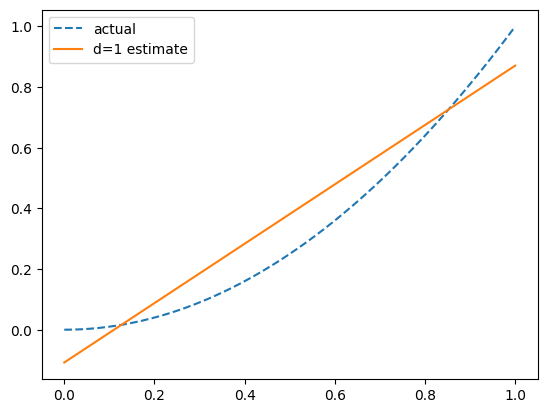

In [185]:
plt.plot(X_act, y_act, linestyle='--', label='actual')
plt.plot(X_act, lr_poly.predict(poly(X_act, 1)), label='d=1 estimate')
         
plt.legend()

# Исследовать зависимость ошибки от сложности модели

In [71]:
from sklearn import metrics

In [195]:
results = []

for d_max in range(0, 10):
    lr = LinearRegression().fit(poly(X, d_max), y)

    y_est_pred = lr.predict(poly(X, d_max))
    y_act_pred = lr.predict(poly(X_act, d_max))

    mse_est = metrics.mean_squared_error(y, y_est_pred)
    mse_act = metrics.mean_squared_error(y_act, y_act_pred)

    results.append({
        'd_max': d_max,
        'mse_estimate': mse_est,
        'mse_actual': mse_act,
    })

results = pd.DataFrame(results)

Text(0.5, 1.0, 'Meas squared error')

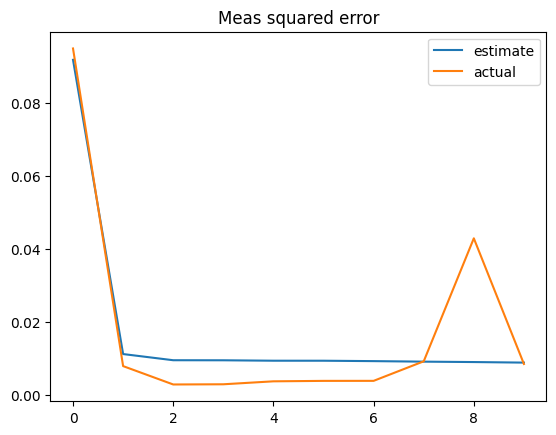

In [196]:
plt.plot(results['d_max'], results['mse_estimate'], label='estimate')
plt.plot(results['d_max'], results['mse_actual'], label='actual')
plt.legend()

plt.title('Meas squared error')

# C помощью отложенной выборки определить оптимальную "сложность" модели

In [107]:
from sklearn.model_selection import train_test_split

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [166]:
results = []

for d_max in range(0, 10):
    lr = LinearRegression(fit_intercept=False).fit(poly(X_train, d_max), y_train)

    y_train_pred= lr.predict(poly(X_train, d_max))
    y_test_pred = lr.predict(poly(X_test, d_max))

    mse_train = metrics.mean_squared_error(y_train, y_train_pred)
    mse_test = metrics.mean_squared_error(y_test, y_test_pred)

    results.append({
        'd_max': d_max,
        'mse_train': mse_train,
        'mse_test': mse_test,
    })

results = pd.DataFrame(results)

In [170]:
results

,d_max,mse_train,mse_test
0,0,0.097017,0.078929
1,1,0.011574,0.011902
2,2,0.009690,0.011709
3,3,0.009503,0.012634
4,4,0.009461,0.012147
5,5,0.009132,0.015179
6,6,0.009082,0.015301
7,7,0.009070,0.015062
8,8,0.008855,0.015706
9,9,0.007758,0.023293


In [171]:
best_score = results.iloc[results['mse_test'].argmin()]
best_param = int(best_score['d_max'])
best_score

d_max        2.000000
mse_train    0.009690
mse_test     0.011709
Name: 2, dtype: float64

In [174]:
model = LinearRegression(fit_intercept=False).fit(poly(X, best_param), y)
model.coef_

array([[0.01544202, 0.26685763, 0.69544906]])

Text(0.5, 1.0, 'Best param = 2')

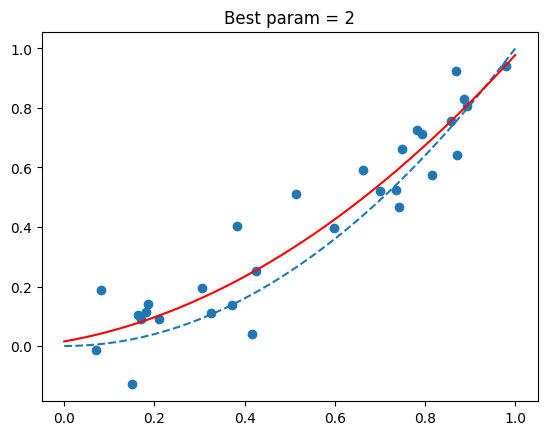

In [178]:
plt.plot(X_act, y_act, linestyle='--')
plt.scatter(X, y)
plt.plot(X_act, model.predict(poly(X_act, best_param)), c='r')

plt.title(f'Best param = {best_param}')